# ✍️ El Yazısı Rakam Tanıma Projesi (MNIST)

Bu projede, MNIST veri seti kullanılarak el yazısıyla yazılmış 0-9 arası rakamları tanıyabilen bir derin öğrenme modeli (CNN) geliştirildi.

## 🔧 Yapılanlar:

- MNIST veri seti yüklendi ve veriler normalize edildi
- CNN mimarisi oluşturularak model eğitildi (5 epoch)
- Test verisi ile model doğruluğu ölçüldü
- Örnek test verisi üzerinde tahmin yapıldı
- Eğitilen model `.h5` formatında kaydedildi
- Aynı model, Streamlit kullanılarak görsel yükleme arayüzüyle test edildi
- Görsel yükleyen kullanıcıya tahmin sonucu arayüzde gösterildi

In [1]:
pip install tensorflow


Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install matplotlib


Note: you may need to restart the kernel to use updated packages.


In [3]:
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
import numpy as np

In [4]:
# MNIST veri setini yüklüyoruz (0-9 arası el yazısı rakamlar)
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

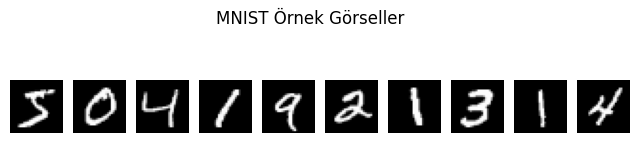

In [5]:
# İlk birkaç görseli görselleştiriyoruz
plt.figure(figsize=(8, 2))
for i in range(10):
    plt.subplot(1, 10, i + 1)
    plt.imshow(x_train[i], cmap='gray')
    plt.axis('off')
plt.suptitle("MNIST Örnek Görseller")
plt.show()

In [6]:
# Verileri normalize ediyoruz ve modele uygun hale getiriyoruz
x_train = x_train / 255.0
x_test = x_test / 255.0

x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

In [7]:
#  CNN modelini tanımlıyoruz
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

C:\Users\Monster\anaconda3\envs\handwriting-env\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [8]:
# Modeli derliyoruz ve eğitiyoruz (5 epoch)
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(x_train, y_train, epochs=5, validation_data=(x_test, y_test))

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.9034 - loss: 0.3242 - val_accuracy: 0.9853 - val_loss: 0.0486
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.9850 - loss: 0.0494 - val_accuracy: 0.9886 - val_loss: 0.0355
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.9902 - loss: 0.0310 - val_accuracy: 0.9885 - val_loss: 0.0360
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.9932 - loss: 0.0219 - val_accuracy: 0.9905 - val_loss: 0.0284
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.9939 - loss: 0.0188 - val_accuracy: 0.9895 - val_loss: 0.0354


In [9]:
# Modelin test verisi üzerindeki doğruluğunu ölçüyoruz
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"Test doğruluğu: {test_acc:.4f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9868 - loss: 0.0422
Test doğruluğu: 0.9895


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


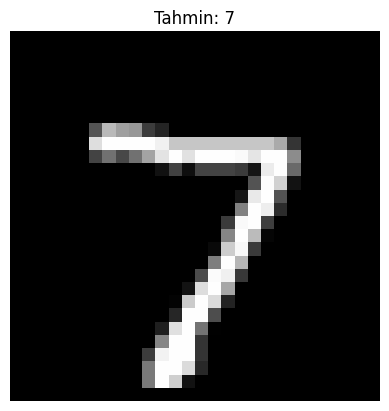

In [10]:
# Test verisinden bir görsel alıp modelin tahminine bakıyoruz
index = 0
img = x_test[index].reshape(1, 28, 28, 1)

prediction = model.predict(img)
predicted_label = np.argmax(prediction)

plt.imshow(x_test[index].reshape(28, 28), cmap='gray')
plt.title(f"Tahmin: {predicted_label}")
plt.axis('off')
plt.show()

In [11]:
# Eğitilen modeli .h5 dosyası olarak kaydediyoruz
model.save("mnist_model.h5")
print("Model başarıyla kaydedildi.")


Model başarıyla kaydedildi.
